# <center> Домашнее задание 2. COVID-19

## Часть 1 (20 баллов)

1.Импортируйте данные о заболеваемости COVID-19 (COVID-19-geographic-distribution-worldwide- 2020-12-08.xlsx) в переменную **covid**. Покажите, сколько в датафрейме строк, столбцов, а также типы данных для всех переменных (5 баллов).

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (16, 9)

#os.chdir("/Users/iakubovskii/Machine_Learning/RANEPA/DataAnalize_ipynb/ДЗ2/")
covid = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-12-08.xlsx")
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
1,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
2,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
3,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865
4,2020-12-04,4,12,2020,119,5,Afghanistan,AF,AFG,38041757.0,Asia,7.107979
...,...,...,...,...,...,...,...,...,...,...,...,...
60617,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60618,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60619,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60620,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [2]:
# Установим иерархический индекс
covid.set_index(["dateRep", "geoId"],inplace = True) 
new_covid = []

for iso in covid.index.levels[1]:
    covid_iso = covid.xs(iso,level=1)
    # Запаздывание числа (lag) новых случаев и смертей
    covid_iso['cases_lag'] = covid_iso['cases'].shift(1)
    covid_iso['deaths_lag'] = covid_iso['deaths'].shift(1)

    # Опережающее значение (lead) новых случаев и смертей
    covid_iso['cases_lead'] = covid_iso['cases'].shift(-1)
    covid_iso['deaths_lead'] = covid_iso['deaths'].shift(-1)
    # Обнуляем индекс
    covid_iso.reset_index(inplace = True)
    # Присоединяем датафрейм для каждой страны
    new_covid.append(covid_iso)
# Объединяем
covid = pd.concat(new_covid)

# Усредняем
covid['avg_cases'] = covid[['cases_lag', "cases_lead"]].mean(axis=1)
covid['avg_deaths'] = covid[['deaths_lag', "deaths_lead"]].mean(axis=1)

# Присваиваем средние значения для отрицательных случаев

covid['cases'] = np.where(covid['cases'] < 0, covid['avg_cases'], covid['cases'])
covid['deaths'] = np.where(covid['deaths'] < 0, covid['avg_deaths'], covid['deaths'])

display(covid[covid['cases'] < 0])
display(covid[covid['deaths'] < 0])
covid.loc[covid['deaths'] < 0] = 0

covid['dateRep'] = pd.to_datetime(covid['dateRep'], errors = 'coerce')
covid = covid[covid['dateRep'].notna()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_lag,deaths_lag,cases_lead,deaths_lead,avg_cases,avg_deaths


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_lag,deaths_lag,cases_lead,deaths_lead,avg_cases,avg_deaths
156,2020-07-05,5,7,2020,121.0,-1.0,Czechia,CZE,10649800.0,Europe,18.704577,75.0,-3.0,141.0,1.0,108.0,-1.0


In [3]:
print('Количество строк:', covid.shape[0])
print('Количество столбцов:', covid.shape[1])
print(f'\nТипы данных:\n{covid.dtypes}')

Количество строк: 60352
Количество столбцов: 17

Типы данных:
dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                float64
deaths                                                               float64
countriesAndTerritories                                               object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
cases_lag                                                            float64
deaths_lag    

2.Выведите топ-10 стран по суммарному количество случаев COVID-19 (3 балла) и визуализируйте (2 балла).

Топ 10 стран по количеству случаев:
 countriesAndTerritories
United_States_of_America    14954332.0
India                        9703770.0
Brazil                       6623911.0
Russia                       2488912.0
France                       2297019.0
Italy                        1743002.5
United_Kingdom               1737960.0
Spain                        1707110.5
Argentina                    1466309.0
Colombia                     1377100.0
Name: cases, dtype: float64


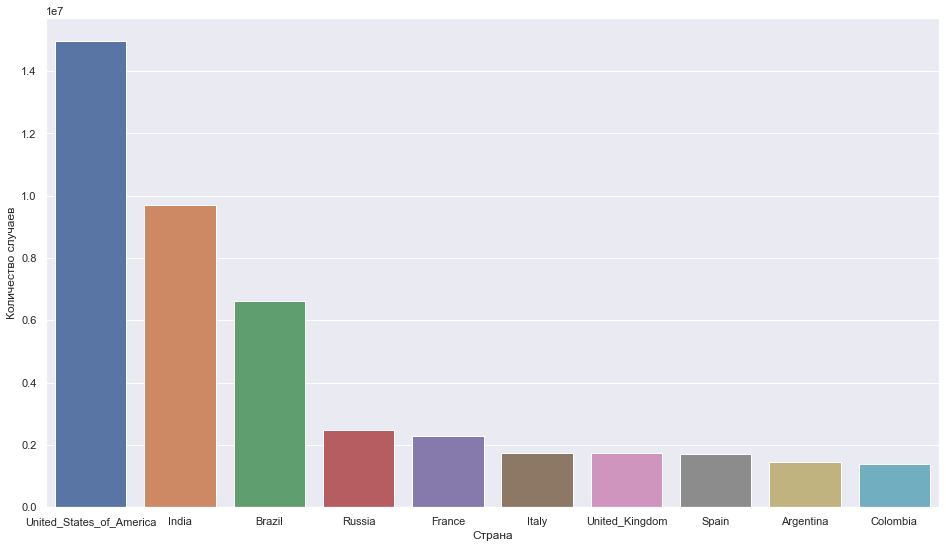

In [7]:
top_cases = covid.groupby('countriesAndTerritories')['cases']\
                          .sum().sort_values(ascending = False)
print('Топ 10 стран по количеству случаев:\n', top_cases[:10])

sns.set()
sns.barplot(x = top_cases[:10].index, y = top_cases[:10])
plt.xlabel('Страна')
plt.ylabel('Количество случаев')
plt.show()

3.Повторите второй пункт для количества случаев на 1000 человек. (5 баллов)

Топ 10 стран по количеству случаев на 1000 человек:


,cases per 1000
countriesAndTerritories,
Andorra,92.993948
Luxembourg,64.609688
Montenegro,61.978649
French_Polynesia,54.091698
Bahrain,53.688114
San_Marino,52.709488
Czechia,51.733272
Belgium,51.719961
Qatar,49.464155


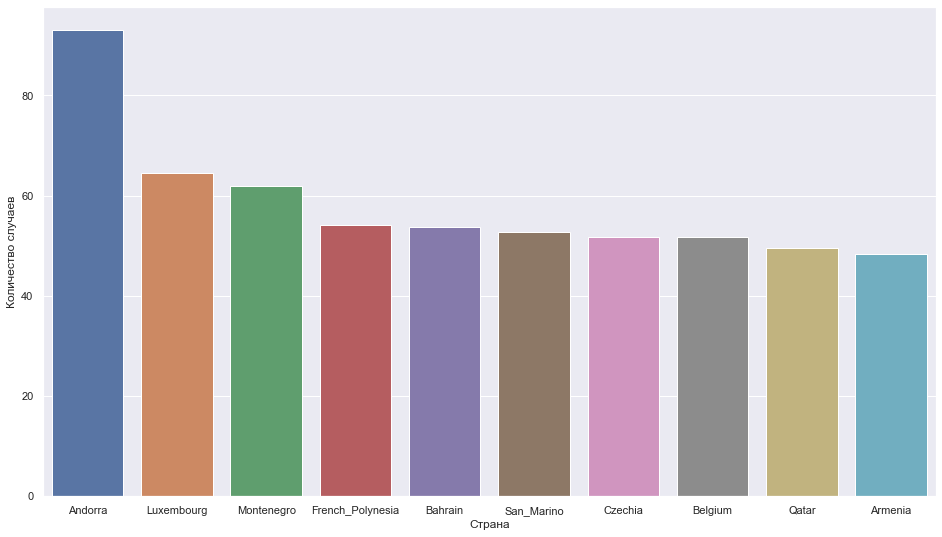

In [15]:
popdata = covid[['countriesAndTerritories', 'popData2019']]\
                 .drop_duplicates(subset = 'countriesAndTerritories')
top_cases_per_1000 = top_cases.reset_index().merge(popdata, how = 'inner', 
                                                   on = 'countriesAndTerritories')
top_cases_per_1000['cases per 1000'] = top_cases_per_1000['cases'] / top_cases_per_1000['popData2019'] * 1000
top_cases_per_1000 = top_cases_per_1000[['countriesAndTerritories', 'cases per 1000']]\
                                         .sort_values(by = 'cases per 1000', ascending = False)

print('Топ 10 стран по количеству случаев на 1000 человек:')
display(top_cases_per_1000.set_index('countriesAndTerritories')[:10])

sns.barplot(x = top_cases_per_1000['countriesAndTerritories'][:10], 
                                   y = top_cases_per_1000['cases per 1000'][:10])
plt.xlabel('Страна')
plt.ylabel('Количество случаев')
plt.show()

4.Постройте два графика: 

- суммарное число ежедневных новых случаев в мире (2 балла)

- суммарное число ежедневных смертей в мире (2 балла)

Найдите дни с наибольшим количеством смертей и наибольшим числом новых случаев в мире (1 балл).


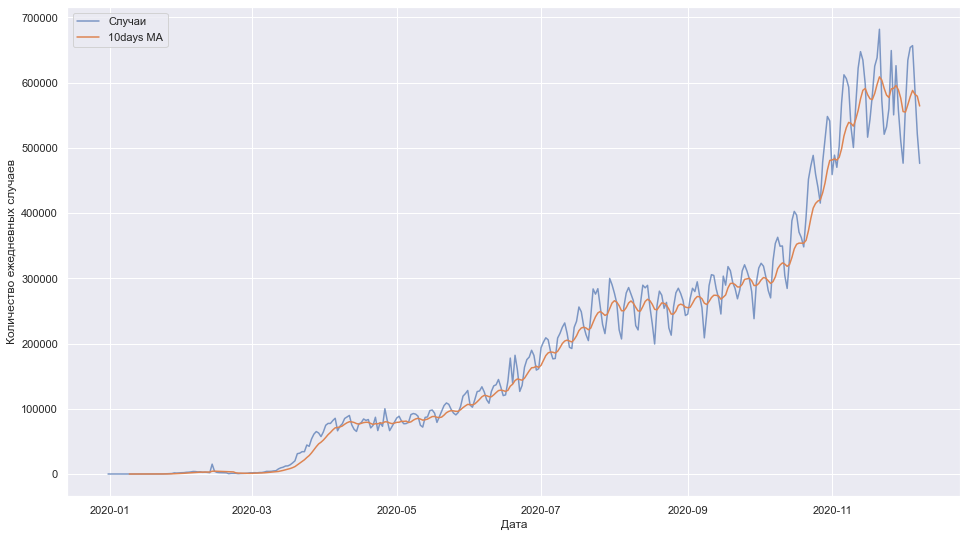

In [9]:
cases_world = covid.groupby('dateRep')['cases'].sum().sort_index()
deaths_world = covid.groupby('dateRep')['deaths'].sum().sort_index()

sns.set()
plt.plot(cases_world.index, cases_world, label = 'Случаи', alpha = 0.7)
plt.plot(cases_world.index, cases_world.rolling(window = 10).mean(), label = '10days MA')
plt.xlabel('Дата')
plt.ylabel('Количество ежедневных случаев')
plt.legend()
plt.show()

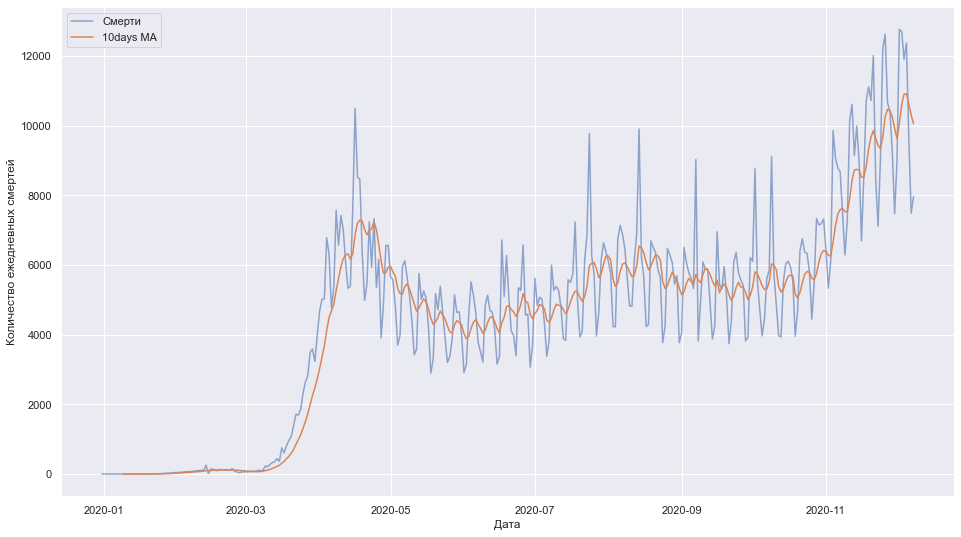

In [10]:
sns.set()
plt.plot(deaths_world.index, deaths_world, label = 'Смерти', alpha = 0.6)
plt.plot(deaths_world.index, deaths_world.rolling(window = 10).mean(), label = '10days MA')
plt.xlabel('Дата')
plt.ylabel('Количество ежедневных смертей')
plt.legend()
plt.show()

In [11]:
# Дни с наибольшим количеством случаев и смертей в мире
print('Макс. кол-во случаев:', cases_world.index[cases_world.argmax()].date())
print('Макс. кол-во смертей:', deaths_world.index[deaths_world.argmax()].date())

Макс. кол-во случаев: 2020-11-21
Макс. кол-во смертей: 2020-12-02


5.Выведите ежедневную динамику долей каждого континента в суммарном количестве новых случаев COVID-19 (5 баллов)

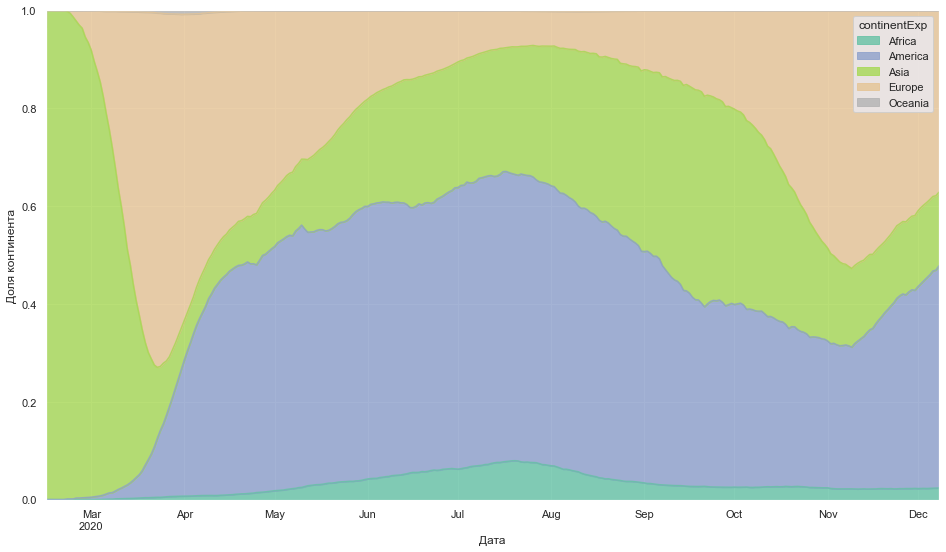

In [24]:
# Группируем данные по континентам и высчитываем доли на каждую дату
cases_by_cont = covid.groupby(['dateRep', 'continentExp'])['cases'].sum().unstack()
cases_by_cont = cases_by_cont.drop('Other', axis = 1)\
                             .apply(lambda x: x / np.sum(x), axis = 1)

# Добавляем 15-дневное сглаживание, чтобы не было пиков
cases_by_cont.loc['2020-02-01':].rolling(15).mean().plot\
                                .area(alpha = 0.8, colormap = 'Set2')
plt.ylim([0, 1])
plt.xlim(['2020-02-15', cases_by_cont.index.max()])
plt.xlabel('Дата')
plt.ylabel('Доля континента')
plt.show()

## Часть 2 (30 баллов)

В этой части вам нужно выбрать страну согласно списку (как было с олимпиадой в ДЗ1).

In [18]:
fintech_list = pd.read_excel("ФинТех-05-20.xlsx")
from random import shuffle
list_countries = covid['countriesAndTerritories'].unique().tolist()
shuffle(list_countries)
dict(zip(fintech_list["ФИО"].tolist(), list_countries))

{'Базуева Мария Дмитриевна': 'Uzbekistan',
 'Бориско Данила Ильич ': 'Paraguay',
 'Братков Герман Сергеевич': 'Madagascar',
 'Суван-оол Орлан Владимирович': 'CuraÃ§ao',
 'Валл Федор Викторович': 'Colombia',
 'Гарбузов Иван Константинович': 'Bahamas',
 'Евменов Максим Андреевич': 'Saint_Kitts_and_Nevis',
 'Егорова Анна Сергеевна ': 'Luxembourg',
 'Едовина Алина Игоревна': 'Austria',
 'Загарнюк Елизавета Максимовна': 'Russia',
 'Захаров Алексей Сергееивч': 'Turks_and_Caicos_islands',
 'Калёнов Алексей Аркадьевич': 'Angola',
 'Карасева Алина Александровна': 'Saint_Vincent_and_the_Grenadines',
 'Каширин Егор Михайлович': 'Botswana',
 'Косинов Андрей Вячеславович': 'Holy_See',
 'Красиков Евгений Владимирович': 'Suriname',
 'Кузьмин Никита Кириллович': 'Iceland',
 'Монгуш Тенгиз Анатольевич': 'Sierra_Leone',
 'Мурадян Акоп Араратович': 'Timor_Leste',
 'Наумова Анастасия Юрьевна': 'Haiti',
 'Панчук Александр Сергеевич': 'Egypt',
 'Пашинина Татьяна Викторовна': 'Netherlands',
 'Пустоваров Арте

Примечание: Орлану досталась ненавистная мне (и я думаю многим) с точки зрения написания страна - CuraÃ§ao. Это остров на карибах (нидерландская колония) и у него везде вот такая хрень с кодировкой. Удобней, конечно, использовать трехзначный ISO3 код для такой страны. Поэтому внизу прикрепляю соответствие полного названия стран и сокращенного.

In [27]:
iso_correspnds = dict(zip(covid['countriesAndTerritories'].unique().tolist(),
     covid['countryterritoryCode'].unique().tolist()))
iso_correspnds['Colombia']

'COL'

Как видим, трехзначный ISO3 код для данной страны - CUW. Поэтому можете делать срезы по этому коду (столбец **countryterritoryCode**)

6.Выберите точку отсчета, когда для данной страны количество случаев COVID-19 стало первый раз положительным. В дальнейшем все задания делаем с этим рядом (10 баллов).


Постройте графики:

- ежедневное число новых случаев COVID-19 для данной страны (4 балла)

- ежедневное число смертей для данной страны (4 балла)

Найдите дни с максимальным количеством новых случаев и максимальным числом смертей (2 балла)

In [29]:
# Датасет по ковиду для Колумбии
mask = (covid['countryterritoryCode'] == 'COL') & (covid['cases'] > 0)
covid_col = covid[mask]
display(covid_col)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,cases_lag,deaths_lag,cases_lead,deaths_lead,avg_cases,avg_deaths
0,2020-12-08,8,12,2020,5997.0,187.0,Colombia,COL,50339443.0,America,242.595056,NaN,NaN,8854.0,175.0,8854.0,175.0
1,2020-12-07,7,12,2020,8854.0,175.0,Colombia,COL,50339443.0,America,243.717436,5997.0,187.0,9642.0,166.0,7819.5,176.5
2,2020-12-06,6,12,2020,9642.0,166.0,Colombia,COL,50339443.0,America,241.869979,8854.0,175.0,9285.0,162.0,9069.5,168.5
3,2020-12-05,5,12,2020,9285.0,162.0,Colombia,COL,50339443.0,America,236.718948,9642.0,166.0,9233.0,188.0,9437.5,177.0
4,2020-12-04,4,12,2020,9233.0,188.0,Colombia,COL,50339443.0,America,234.074898,9285.0,162.0,9297.0,183.0,9291.0,172.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-03-15,15,3,2020,18.0,0.0,Colombia,COL,50339443.0,America,NaN,11.0,0.0,7.0,0.0,9.0,0.0
269,2020-03-14,14,3,2020,7.0,0.0,Colombia,COL,50339443.0,America,NaN,18.0,0.0,6.0,0.0,12.0,0.0
270,2020-03-12,12,3,2020,6.0,0.0,Colombia,COL,50339443.0,America,NaN,7.0,0.0,2.0,0.0,4.5,0.0
271,2020-03-10,10,3,2020,2.0,0.0,Colombia,COL,50339443.0,America,NaN,6.0,0.0,1.0,0.0,3.5,0.0


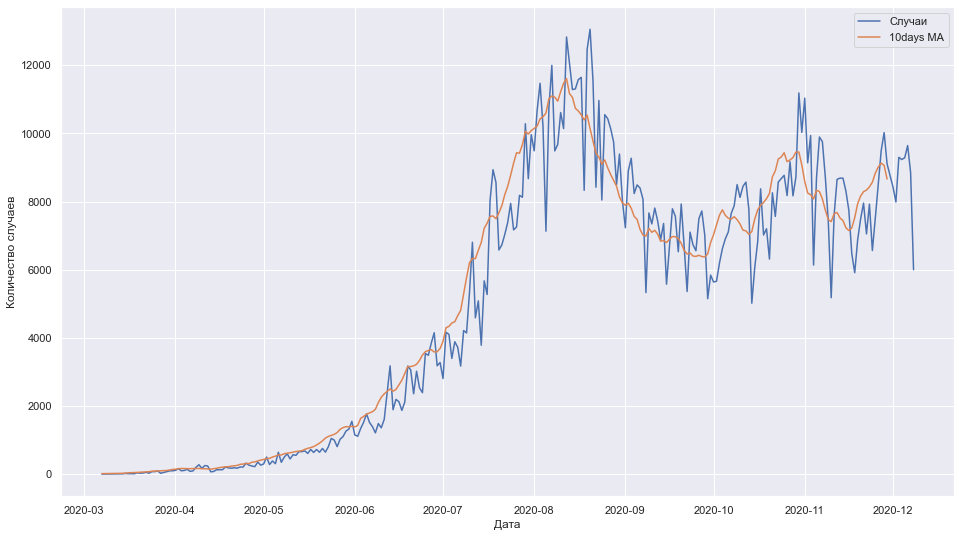

In [31]:
# Количество случаев ковид в Колумбии
sns.set()
plt.plot(covid_col['dateRep'], covid_col['cases'], label = 'Случаи')
plt.plot(covid_col['dateRep'], covid_col['cases'].rolling(10).mean(), label = '10days MA')
plt.xlabel('Дата')
plt.ylabel('Количество случаев')
plt.legend()
plt.show()

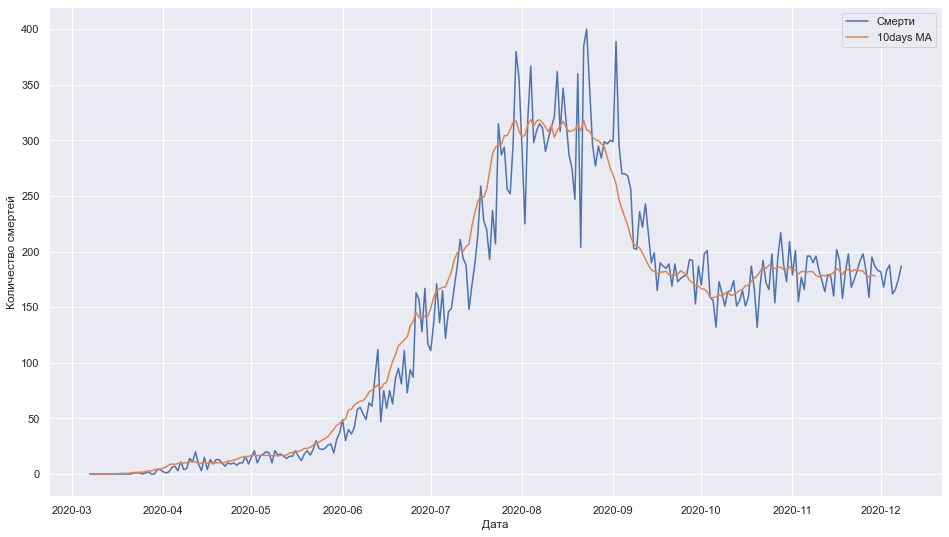

In [33]:
# Количество смертей от ковид в Колумбии
sns.set()
plt.plot(covid_col['dateRep'], covid_col['deaths'], label = 'Смерти')
plt.plot(covid_col['dateRep'], covid_col['deaths'].rolling(10).mean(), label = '10days MA')
plt.xlabel('Дата')
plt.ylabel('Количество смертей')
plt.legend()
plt.show()

In [34]:
# Даты с наибольшим количеством случаев и смертей в Колумбии
print('Макс. кол-во случаев:', covid_col.iloc[np.argmax(covid_col['cases']), 0].date())
print('Макс. кол-во смертей:', covid_col.iloc[np.argmax(covid_col['deaths']), 0].date())

Макс. кол-во случаев: 2020-08-20
Макс. кол-во смертей: 2020-08-23


7.Число смертей и число новых случаев (10 баллов).

- Выведите 1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99% квантили для числа новых случаев и числа смертей данной страны (2 балла).

- Постройте функцию плотности распределения числа новых случаев и числа смертей для данной страны (2 балла).

- Выведите коэффициент корреляции между числом смертей и числом новых случаев (2 балла).

- Выведите коэффициенты корреляции между числом новых случаев и числом смертей в зависимости от запаздывания числа смертей (создайте 14 столбцов с 14 видами лагов и посмотрите на корреляции) (4 балла).

In [36]:
percentiles_bounds = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentiles_cases = np.round(np.percentile(covid_col['cases'], percentiles_bounds), 2)

percentiles_string = '1%, 5%, 10%, 25%, 50%, 75%, 90%, 95%, 99%'
percentiles_list = percentiles_string.replace(' ','').split(',')
print('Персентили для числа новых случаев:')
list(zip(percentiles_list, percentiles_cases))

Персентили для числа новых случаев:


[('1%', 6.71),
 ('5%', 50.2),
 ('10%', 109.8),
 ('25%', 658.75),
 ('50%', 5954.0),
 ('75%', 8339.0),
 ('90%', 9879.3),
 ('95%', 10838.5),
 ('99%', 12180.84)]

In [38]:
percentiles_deaths = np.round(np.percentile(covid_col['deaths'], percentiles_bounds), 2)
print('Персентили для числа смертей:')
list(zip(percentiles_list, percentiles_deaths))

Персентили для числа смертей:


[('1%', 0.0),
 ('5%', 0.55),
 ('10%', 4.1),
 ('25%', 20.0),
 ('50%', 164.5),
 ('75%', 198.0),
 ('90%', 295.9),
 ('95%', 315.0),
 ('99%', 381.45)]

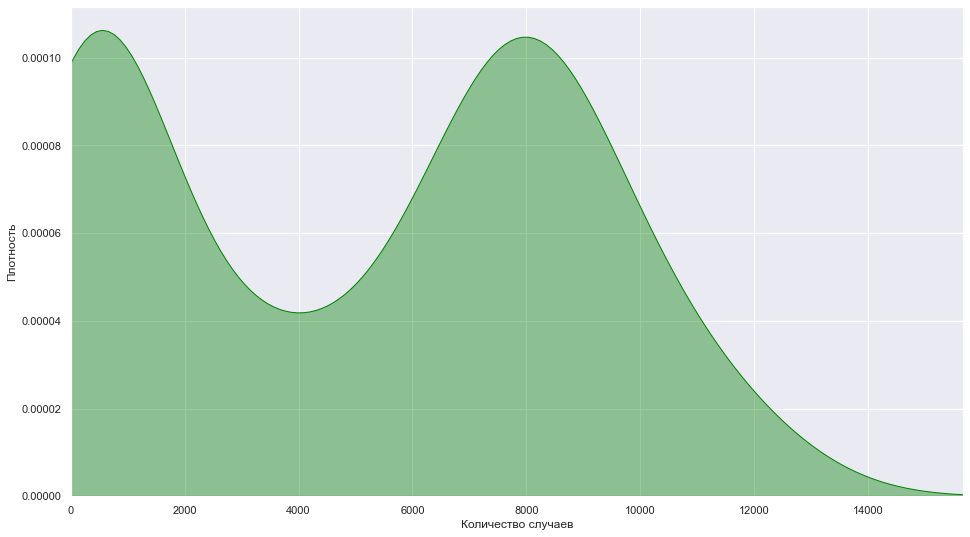

In [39]:
# Функция плотности для числа новых случаев
sns.set()
sns.kdeplot(covid_col['cases'], fill = True, alpha = 0.4, color = 'green')
plt.xlim([0, covid_col['cases'].max()*1.2])
plt.xlabel('Количество случаев')
plt.ylabel('Плотность')
plt.show()

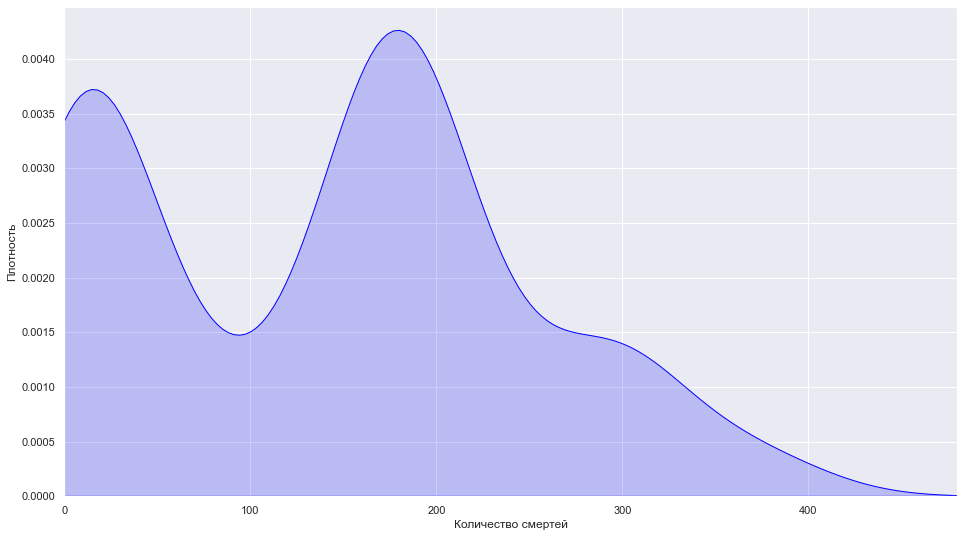

In [40]:
# Функция плотности для числа смертей
sns.set()
sns.kdeplot(covid_col['deaths'], fill = True, alpha = 0.2, color = 'blue')
plt.xlim([0, covid_col['deaths'].max()*1.2])
plt.xlabel('Количество смертей')
plt.ylabel('Плотность')
plt.show()

In [41]:
from scipy.stats import pearsonr

# Коэффициент корреляции для случаев и смертей
r, p_value = pearsonr(covid_col['cases'], covid_col['deaths'])
print('Коэффициент корреляции:', np.round(r, 3))

Коэффициент корреляции: 0.916


In [42]:
# Датасет с лагами для смертей
shifted_deaths = covid_col[['dateRep', 'deaths']].set_index('dateRep')
shifts_df = shifted_deaths.copy()
for shift in range(1, 15):
    df = shifts_df.shift(-shift)
    df.columns = [f'deaths_shift_{shift}']
    shifted_deaths = shifted_deaths.merge(df, how = 'outer', 
                                          right_index = True, left_index = True)

In [43]:
# Коэффициенты корреляции для данных с лагами (число = продолжительность лага в днях)
shifted_deaths.iloc[:, 1:].corrwith(covid_col.set_index('dateRep')['cases'])

deaths_shift_1     0.910950
deaths_shift_2     0.905697
deaths_shift_3     0.917696
deaths_shift_4     0.910030
deaths_shift_5     0.910927
deaths_shift_6     0.909766
deaths_shift_7     0.910521
deaths_shift_8     0.907255
deaths_shift_9     0.898397
deaths_shift_10    0.891221
deaths_shift_11    0.889109
deaths_shift_12    0.887631
deaths_shift_13    0.887159
deaths_shift_14    0.881478
dtype: float64

8.Постройте ряд прироста числа новых случаев и прироста количества смертей в %. 
Выполните все пункты из задания 7 для данных рядов. (10 баллов)

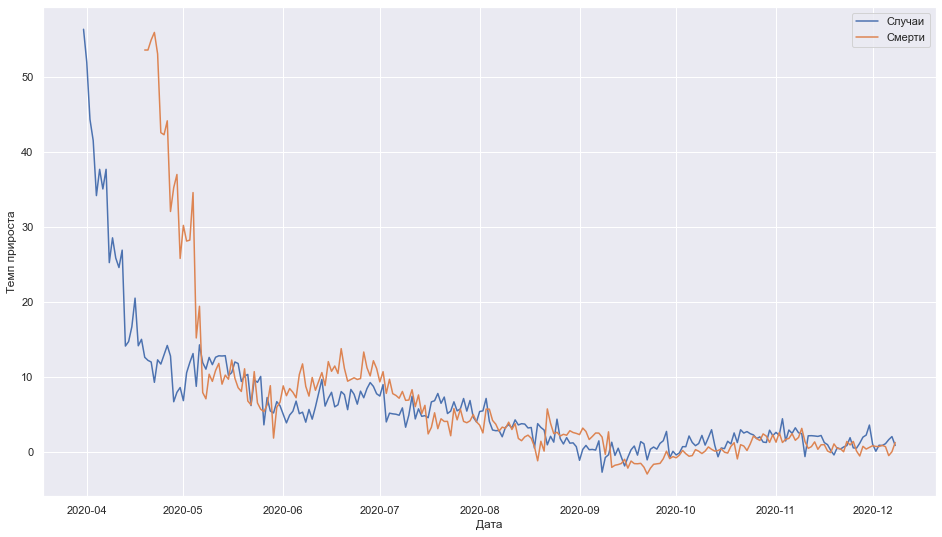

In [99]:
# Прирост числа новых случаев и смертей в %
pct_growth = covid_col[['cases', 'deaths', 'dateRep']].set_index('dateRep')\
                                                      .sort_index().pct_change()*100

# Сглаженный график
plt.plot(pct_growth.index, pct_growth['cases'].rolling(20).mean(), label = 'Случаи')
plt.plot(pct_growth.index, pct_growth['deaths'].rolling(20).mean(), label = 'Смерти')
plt.xlabel('Дата')
plt.ylabel('Темп прироста')
plt.legend()
plt.show()

In [56]:
perc_cases_change = np.round(np.percentile(pct_growth['cases'].dropna(), percentiles_bounds), 2)
print('Персентили для прироста новых случаев:')
list(zip(percentiles_list, perc_cases_change))

Персентили для числа новых случаев:


[('1%', -47.73),
 ('5%', -32.96),
 ('10%', -24.23),
 ('25%', -9.57),
 ('50%', 2.13),
 ('75%', 16.21),
 ('90%', 43.64),
 ('95%', 58.52),
 ('99%', 165.2)]

In [61]:
perc_deaths_change = np.round(np.percentile(pct_growth['deaths'].dropna(), percentiles_bounds), 2)
print('Персентили для прироста смертей:')
list(zip(percentiles_list, perc_deaths_change))

Персентили для прироста смертей:


[('1%', -69.4),
 ('5%', -43.35),
 ('10%', -23.1),
 ('25%', -10.8),
 ('50%', 0.0),
 ('75%', 16.52),
 ('90%', 40.22),
 ('95%', 83.79),
 ('99%', inf)]

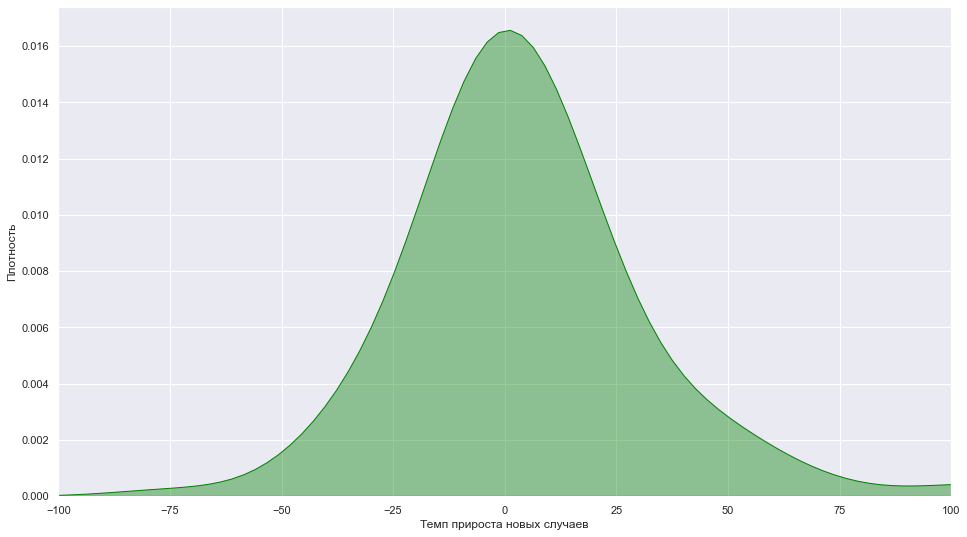

In [88]:
# Функция плотности для прироста новых случаев
sns.set()
sns.kdeplot(pct_growth['cases'].dropna(), fill = True, alpha = 0.4, color = 'green')
plt.xlabel('Темп прироста новых случаев')
plt.ylabel('Плотность')
plt.xlim([-100, 100])
plt.show()

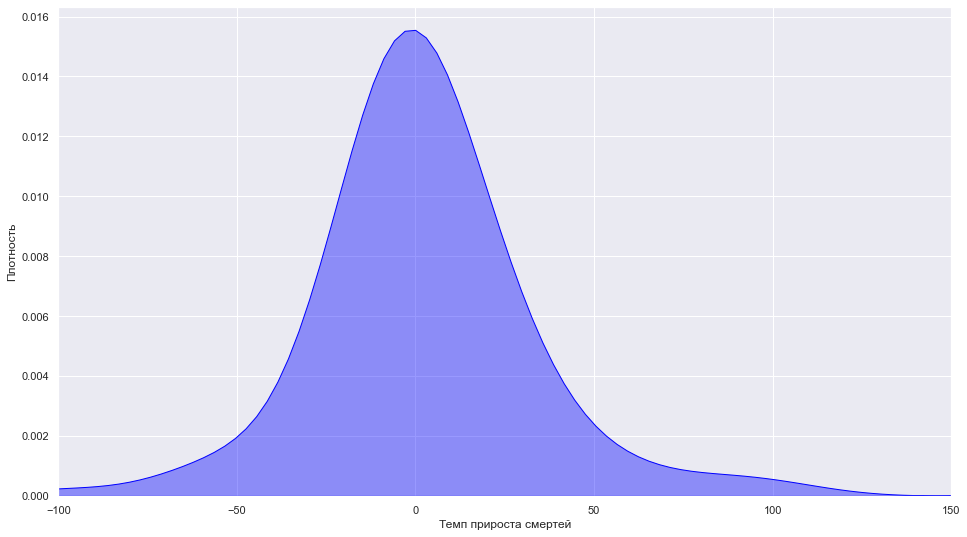

In [103]:
# Функция плотности для прироста смертей
sns.set()
sns.kdeplot(pct_growth['deaths'].dropna().replace(np.inf, 0), fill = True, alpha = 0.4, color = 'blue')
plt.xlabel('Темп прироста смертей')
plt.ylabel('Плотность')
plt.xlim([-100, 150])
plt.show()

In [104]:
# Коэффициент корреляции для прироста случаев и смертей
pct_growth = pct_growth.dropna().replace(np.inf, 0)
r, p_value = pearsonr(pct_growth['cases'], pct_growth['deaths'])
print('Коэффициент корреляции:', np.round(r, 3))

Коэффициент корреляции: 0.056


In [109]:
# Датасет с лагами для прироста смертей
shifted_deaths_change = pct_growth['deaths'].to_frame()
shifts_df = shifted_deaths_change.copy()
for shift in range(1, 15):
    df = shifts_df.shift(-shift)
    df.columns = [f'deaths_shift_{shift}']
    shifted_deaths_change = shifted_deaths_change.merge(df, how = 'outer', 
                                                        right_index = True, left_index = True)

In [111]:
# Коэффициенты корреляции для данных с лагами (число = продолжительность лага в днях)
shifted_deaths_change.iloc[:, 1:].corrwith(pct_growth['cases'])

deaths_shift_1    -0.039916
deaths_shift_2     0.024483
deaths_shift_3     0.091819
deaths_shift_4    -0.165702
deaths_shift_5     0.088111
deaths_shift_6     0.018916
deaths_shift_7     0.083534
deaths_shift_8     0.047503
deaths_shift_9     0.127549
deaths_shift_10    0.057283
deaths_shift_11    0.034076
deaths_shift_12   -0.029123
deaths_shift_13    0.208325
deaths_shift_14   -0.011243
dtype: float64

## Часть 3 (50 баллов)

9.Работа с данными World Bank. В этом задании вам нужно загрузить данные из Всемирного Банка по следующим переменным (indicator):

- NY.GDP.MKTP.CD (ВВП в текущих ценах)

- NY.GDP.PCAP.PP.KD (ВВП по ППС в ценах 2017 года на душу населения)

- SP.POP.TOTL (Население страны)

- SP.RUR.TOTL.ZS (Доля сельского населения к общему населению)

- SH.XPD.CHEX.GD.ZS (Доля расходов на здравоохранение к ВВП)

Выведите первые ТОП-10 стран и последние ТОП-10 стран по каждому из данных показателей (5 баллов):

- ВВП (на 2019 год)

- ВВП на душу населения (на 2019 год)

- Населению (на 2019 год)

- Доле сельского населения (на 2019 год)

- Расходам на здравоохранение (на 2017 год)

Визуализируйте динамику изменения рангов (1 место, 2 место и т.д.) для данных стран из первых ТОП-10 и последних ТОП-10. Это будут графики временных рядов, где по оси x - год, а по оси y - ранг каждой страны (10 баллов).

Ранги вычисляются методом .rank(ascending=False).

In [116]:
from pandas_datareader import wb

# Загрузим данные по нужным показателям
data = wb.download(indicator = ['NY.GDP.MKTP.CD', 'NY.GDP.PCAP.PP.KD', 
                                'SP.POP.TOTL', 'SP.RUR.TOTL.ZS', 'SH.XPD.CHEX.GD.ZS'],
                  country = 'ALL', start = 2000, end = 2019)
data.columns = ['GDP', 'GDP per capita', 'Population', 
              'Rural population share', 'Healthcare expenditures']
data

GDP  GDP per capita   Population  \
country    year                                              
Arab World 2019  2.817415e+12    14602.938214  427870270.0   
           2018  2.771384e+12    14622.065826  419790591.0   
           2017  2.516121e+12    14555.474921  411898967.0   
           2016  2.469440e+12    14663.549625  404024435.0   
           2015  2.534724e+12    14441.436785  396028278.0   
...                       ...             ...          ...   
Zimbabwe   2004  5.805598e+09     2480.859342   12019912.0   
           2003  5.727592e+09     2642.103627   11982224.0   
           2002  6.342116e+09     3190.506481   11954290.0   
           2001  6.777385e+09     3510.893992   11923914.0   
           2000  6.689958e+09     3473.429801   11881477.0   

                 Rural population share  Healthcare expenditures  
country    year                                                   
Arab World 2019               40.798353                      NaN  
           2018               41.074581                 5.225987  
           2017               41.358516                 5.561266  
           2016               41.654725                 5.009866  
           2015               41.968533                 5.114774  
...                                 ...                      ...  
Zimbabwe   2004               65.706000                      NaN  
           2003               65.521000                      NaN  
           2002               65.415000                      NaN  
           2001               65.830000                      NaN  
           2000               66.242000                      NaN  

[5280 rows x 5 columns]

In [117]:
# Отчистим данные от регионов
countries = wb.get_countries()[['name', 'region', 'iso3c']]
regions = countries[countries['region'] == 'Aggregates']['name']
data = data.unstack()[~data.unstack().index.isin(regions)].stack()

In [118]:
# Первые топ-10 стран по показателям
for indicator in data.columns[:-1]:
    display(data.loc[(slice(None), '2019'), indicator]\
                .sort_values(ascending = False)[:10])
display(data.loc[(slice(None), '2017'), 'Healthcare expenditures']\
            .sort_values(ascending = False)[:10])

country                    year
United States              2019    2.143323e+13
China                      2019    1.434290e+13
Latin America & Caribbean  2019    5.733774e+12
Japan                      2019    5.081770e+12
Germany                    2019    3.861124e+12
India                      2019    2.868929e+12
United Kingdom             2019    2.829108e+12
France                     2019    2.715518e+12
Italy                      2019    2.003576e+12
Brazil                     2019    1.839758e+12
Name: GDP, dtype: float64

country               year
Macao SAR, China      2019    123965.286432
Luxembourg            2019    114481.533179
Singapore             2019     97341.468645
Qatar                 2019     90043.926180
Ireland               2019     86781.390219
Bermuda               2019     81797.866520
Switzerland           2019     68627.828661
United Arab Emirates  2019     67119.132637
Norway                2019     63633.101960
United States         2019     62530.389595
Name: GDP per capita, dtype: float64

country                    year
China                      2019    1.397715e+09
India                      2019    1.366418e+09
Sub-Saharan Africa         2019    1.106958e+09
Latin America & Caribbean  2019    6.464308e+08
United States              2019    3.282395e+08
Indonesia                  2019    2.706256e+08
Pakistan                   2019    2.165653e+08
Brazil                     2019    2.110495e+08
Nigeria                    2019    2.009636e+08
Bangladesh                 2019    1.630462e+08
Name: Population, dtype: float64

country           year
Papua New Guinea  2019    86.750
Burundi           2019    86.634
Liechtenstein     2019    85.629
Niger             2019    83.483
Malawi            2019    82.826
Rwanda            2019    82.687
Samoa             2019    81.944
Sri Lanka         2019    81.415
St. Lucia         2019    81.246
South Sudan       2019    80.101
Name: Rural population share, dtype: float64

country                year
Tuvalu                 2017    17.728254
United States          2017    17.003614
Sierra Leone           2017    16.620172
Marshall Islands       2017    16.400076
Micronesia, Fed. Sts.  2017    12.318838
Palau                  2017    12.128451
Switzerland            2017    11.895156
Afghanistan            2017    11.777236
Cuba                   2017    11.711327
Nauru                  2017    11.583323
Name: Healthcare expenditures, dtype: float64

In [119]:
# Последние ТОП-10 стран по показателям
for indicator in data.columns[:-1]:
    display(data.loc[(slice(None), '2019'), indicator]\
                .sort_values()[:10])
display(data.loc[(slice(None), '2017'), 'Healthcare expenditures']\
            .sort_values()[:10])

country                         year
Tuvalu                          2019    4.727146e+07
Nauru                           2019    1.182234e+08
Kiribati                        2019    1.946472e+08
Palau                           2019    2.683549e+08
Sao Tome and Principe           2019    4.186374e+08
Tonga                           2019    5.123501e+08
Dominica                        2019    5.824037e+08
St. Vincent and the Grenadines  2019    8.247185e+08
Samoa                           2019    8.522502e+08
Vanuatu                         2019    9.342400e+08
Name: GDP, dtype: float64

country                   year
Burundi                   2019     751.663957
Central African Republic  2019     944.868093
Malawi                    2019    1059.723490
Congo, Dem. Rep.          2019    1097.948853
Niger                     2019    1224.510472
Mozambique                2019    1281.391836
Liberia                   2019    1427.819090
Chad                      2019    1579.626695
Togo                      2019    1596.644938
Madagascar                2019    1647.021160
Name: GDP per capita, dtype: float64

country                   year
Tuvalu                    2019    11646.0
Nauru                     2019    12581.0
Palau                     2019    18008.0
British Virgin Islands    2019    30030.0
Gibraltar                 2019    33701.0
San Marino                2019    33860.0
St. Martin (French part)  2019    38002.0
Liechtenstein             2019    38019.0
Turks and Caicos Islands  2019    38191.0
Monaco                    2019    38964.0
Name: Population, dtype: float64

country                    year
Gibraltar                  2019    0.0
Macao SAR, China           2019    0.0
Bermuda                    2019    0.0
Hong Kong SAR, China       2019    0.0
Sint Maarten (Dutch part)  2019    0.0
Singapore                  2019    0.0
Kuwait                     2019    0.0
Nauru                      2019    0.0
Cayman Islands             2019    0.0
Monaco                     2019    0.0
Name: Rural population share, dtype: float64

country            year
Monaco             2017    1.642668
Brunei Darussalam  2017    2.270364
Papua New Guinea   2017    2.270855
Bangladesh         2017    2.275222
Djibouti           2017    2.464763
Lao PDR            2017    2.525149
Benin              2017    2.644484
Qatar              2017    2.721601
Vanuatu            2017    2.760950
Gabon              2017    2.780745
Name: Healthcare expenditures, dtype: float64

<Figure size 1152x648 with 0 Axes>

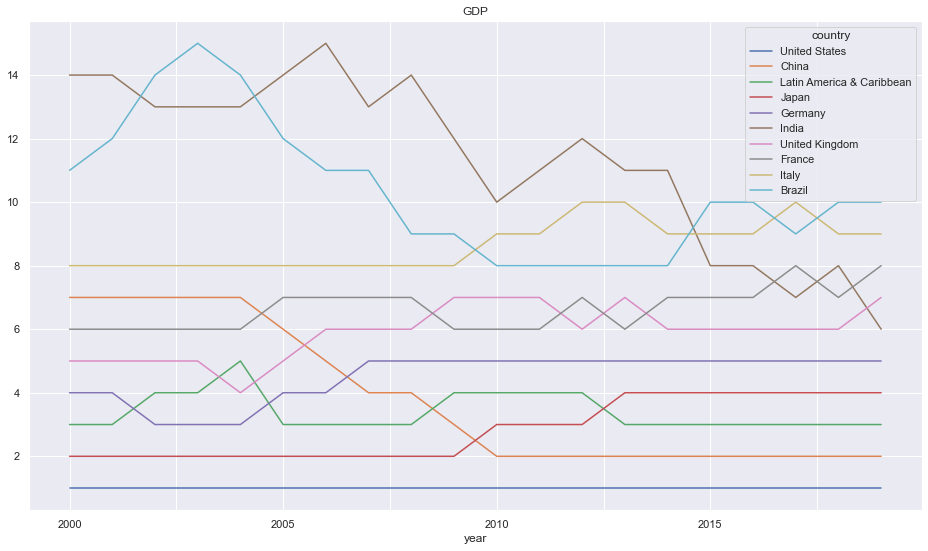

<Figure size 1152x648 with 0 Axes>

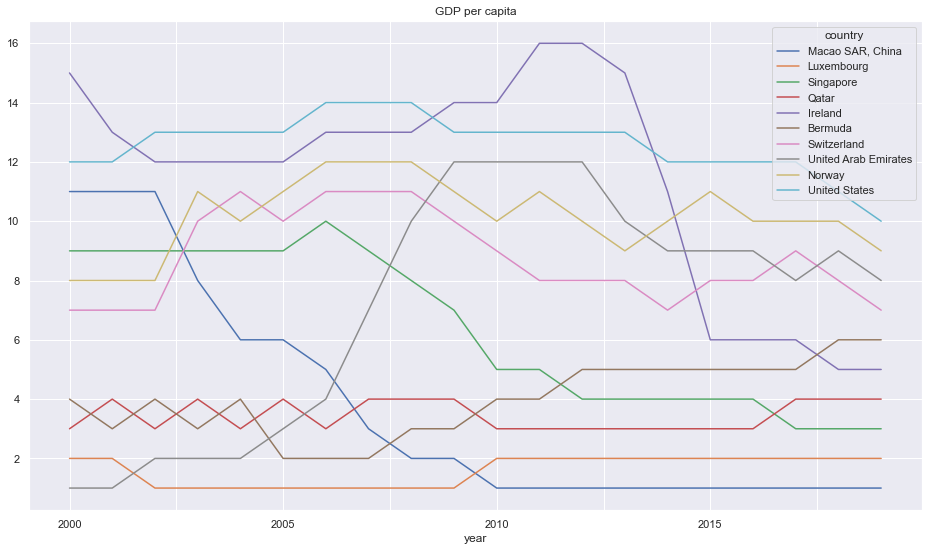

<Figure size 1152x648 with 0 Axes>

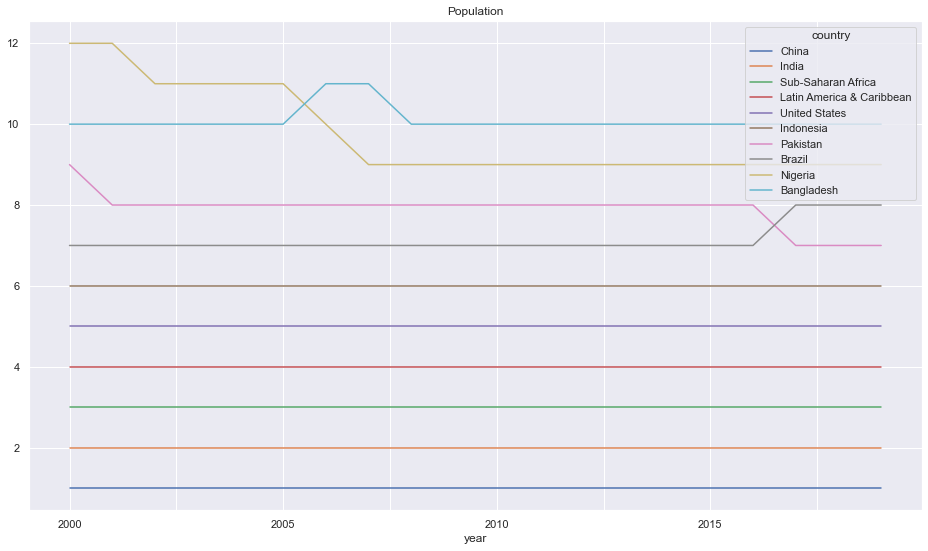

<Figure size 1152x648 with 0 Axes>

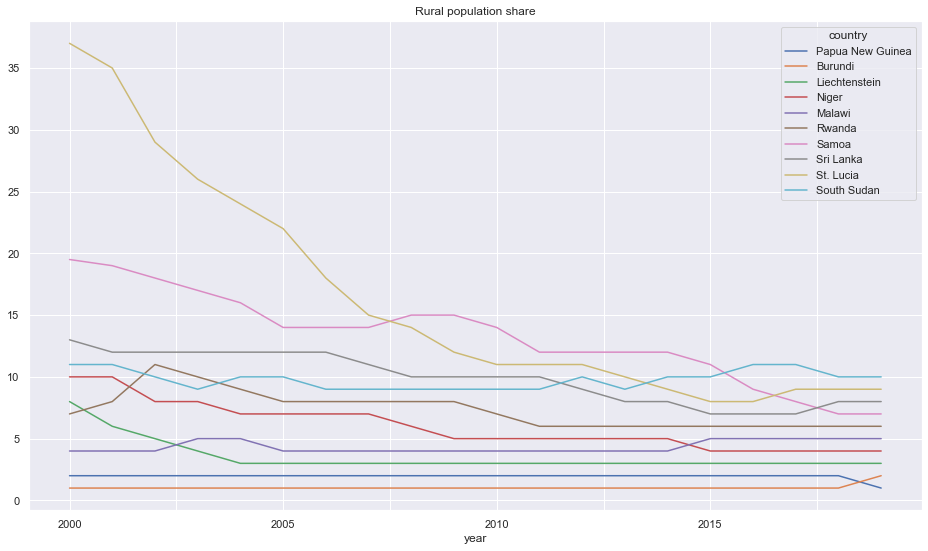

<Figure size 1152x648 with 0 Axes>

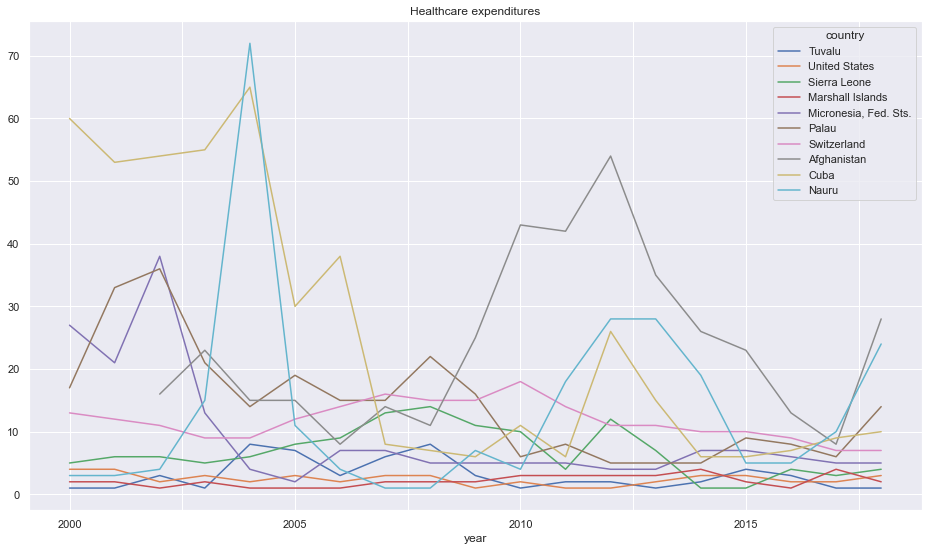

In [120]:
# Изменение рангов первых ТОП-10 стран
years = ['2019']*4 + ['2017']
for i, indicator in enumerate(data.columns):
    plt.figure()
    df = data[indicator].unstack().sort_values(by = years[i], ascending = False)
    df.rank(ascending = False).iloc[:10].T.plot()
    plt.title(indicator)
    plt.show()

<Figure size 1152x648 with 0 Axes>

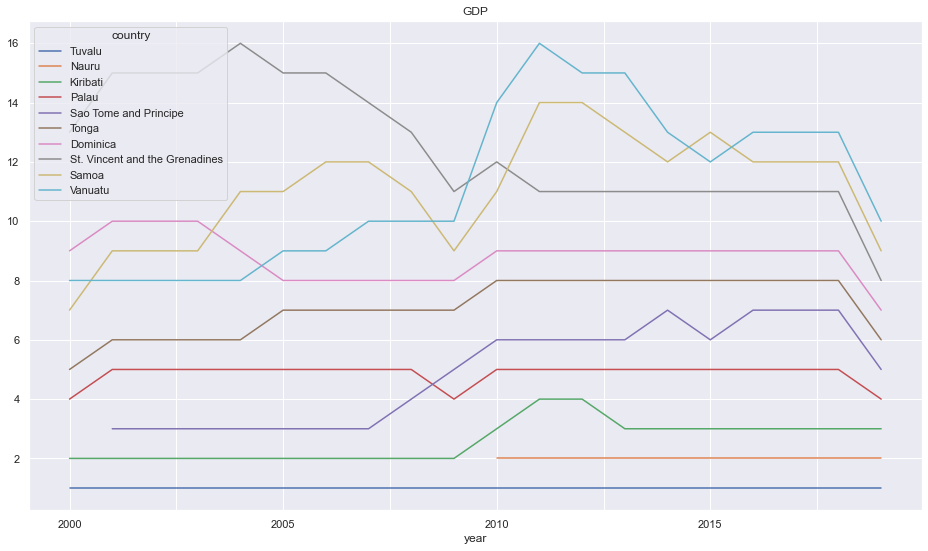

<Figure size 1152x648 with 0 Axes>

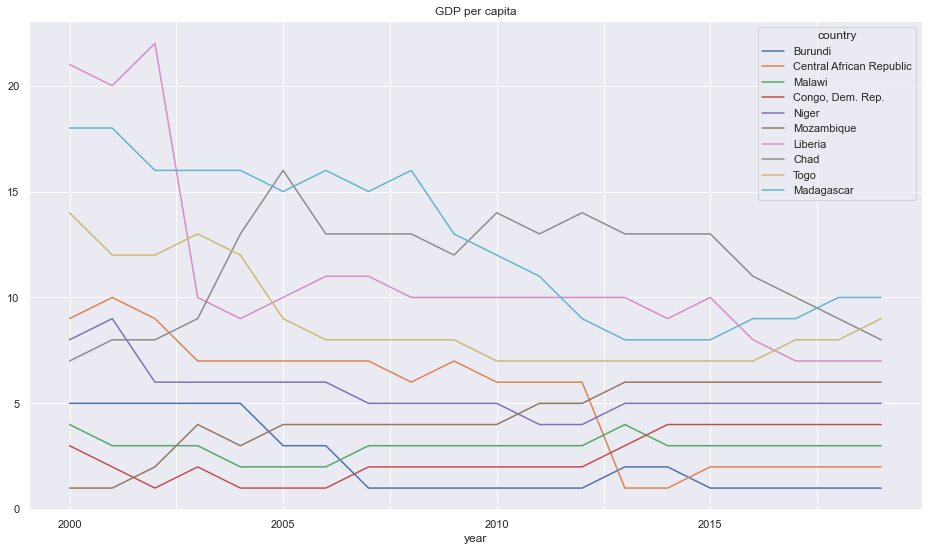

<Figure size 1152x648 with 0 Axes>

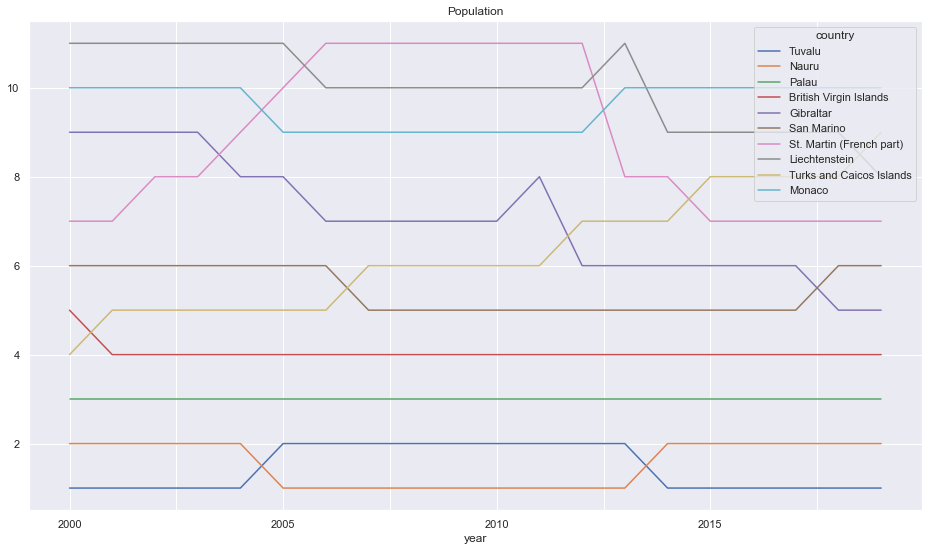

<Figure size 1152x648 with 0 Axes>

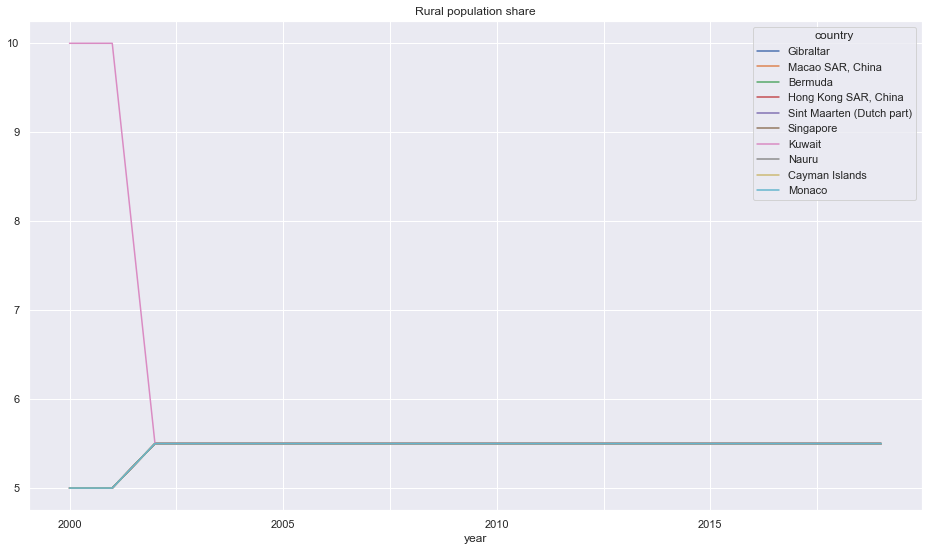

<Figure size 1152x648 with 0 Axes>

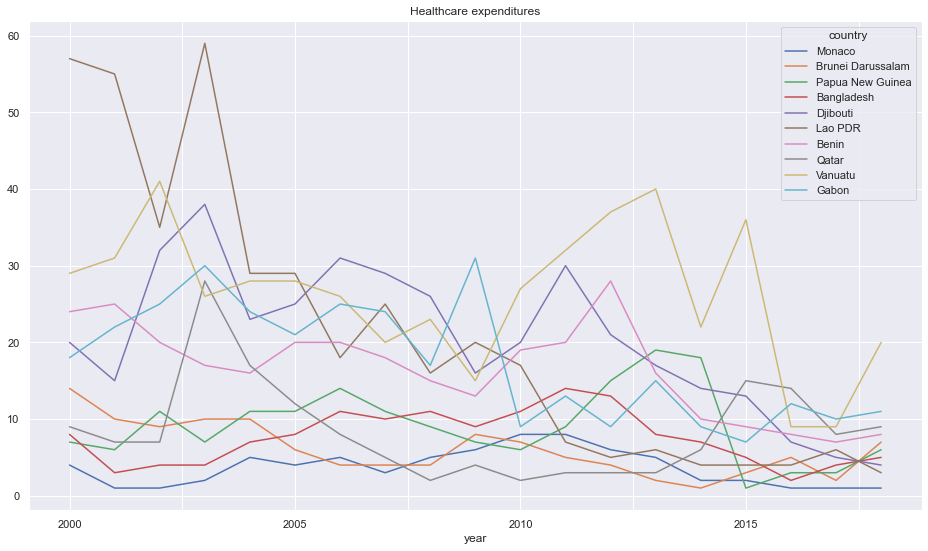

In [121]:
# Изменение рангов последних ТОП-10 стран
for i, indicator in enumerate(data.columns):
    plt.figure()
    df = data[indicator].unstack().sort_values(by = years[i])
    df.rank().iloc[:10].T.plot()
    plt.title(indicator)
    plt.show()

10.Взаимосвязь между COVID-19 и макроэкономическими показателями стран (35 баллов).

- Создайте переменные с общим количеством смертей и количеством случаев COVID-19 по странам мира (2 балла)

- Постройте диаграммы рассеивания для данных переменных с макроэкономическими индикаторами, выгруженными выше (8 баллов)

- Определите ***страны-выбросы*** по этим 7 показателям (5 макроэкономических и 2 ковидных) и сформируйте выборку стран для регрессионного анализа. Для этого постройте коробчатые диаграммы (boxplot) и найдите наблюдения, которые выходят за усики такой диаграммы (напомню, что это значения, превышающие +-1.5*IQR). Соответственно, если какая-то страна выкидывается по одному показателю, то она так же выкидывается и из всей выборки. (5 баллов).

- Постройте 4 линейные регрессии (можно через statsmodels.api), где в качестве объясняющих переменных будут выступать макроэкономические факторы, а в качестве зависимых переменных - ковидные переменные (2 регрессии с выбросами и 2 регрессии без выбросов). Проинтерпретируйте результаты (коэффициент детерминации, значимость коэффициентов, влияние объясняющих переменных на зависимые). Сравните результаты (20 баллов).

In [122]:
# Присоединяем iso-коды для однозначного определения страны
data['iso'] = list(pd.Series(list(zip(*data.index))[0]).map(iso_correspnds))
data.index = data.index.droplevel(0)

In [123]:
# Формируем датасеты для соединения
indicators_2019 = data.loc['2019', ['GDP', 'GDP per capita', 'Population', 
                                    'Rural population share', 'iso']].set_index('iso')
indicators_2017 = data.loc['2017', ['Healthcare expenditures', 'iso']].set_index('iso')
covid_df = covid.groupby('countryterritoryCode')['cases', 'deaths'].sum()

In [124]:
# Общий датасет
final_df = covid_df.join([indicators_2019, indicators_2017], how = 'inner').dropna()

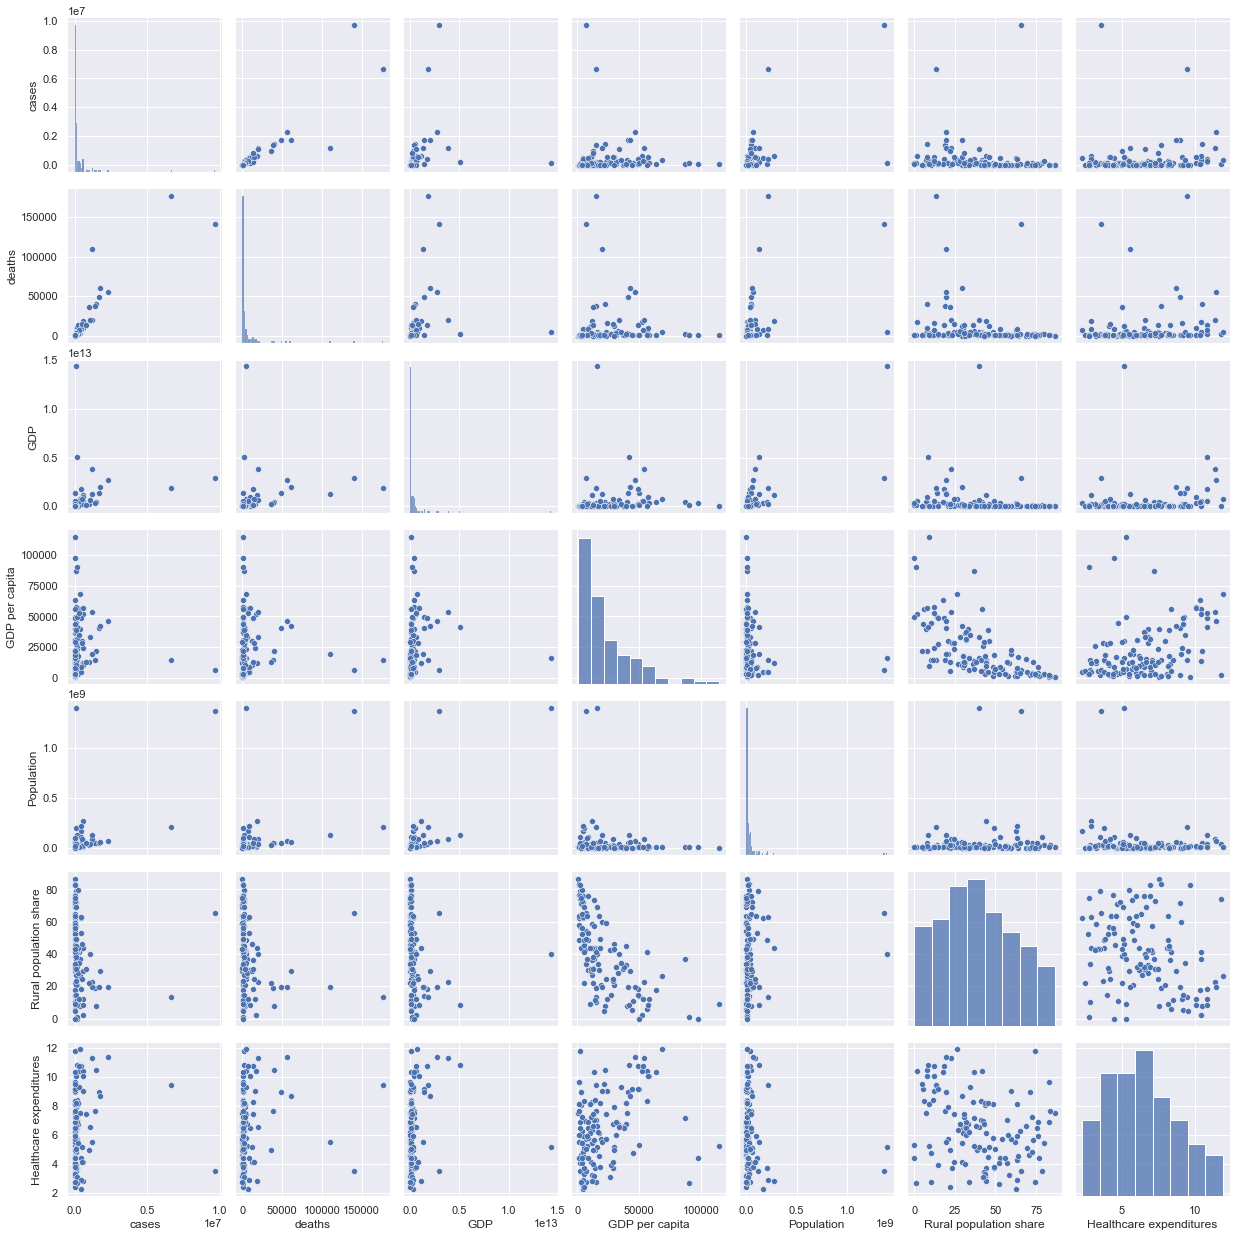

In [125]:
# Попарные диаграммы рассеивания
sns.pairplot(final_df)
plt.show()

In [281]:
# Функция для замены выбросов на NaN
def define_outliers(values):
    IQR = values.quantile(0.75) - values.quantile(0.25)
    lower_bound = values.quantile(0.25) - IQR*1.5
    upper_bound = values.quantile(0.75) + IQR*1.5
    values[(values < lower_bound) | (values > upper_bound)] = np.nan
    return values

# Датасет без выбросов
no_outliers_df = final_df.copy().apply(define_outliers).dropna()

In [282]:
import statsmodels.api as sm

# Определение зависимых и независмых переменных для регрессии
X_no_outliers = no_outliers_df.iloc[:, 2:]
X_outliers = final_df.iloc[:, 2:]

y_cases_outliers = final_df['cases']
y_deaths_outliers = final_df['deaths']
y_cases_no_outliers = no_outliers_df['cases']
y_deaths_no_outliers = no_outliers_df['deaths']

In [287]:
print('Модель с выбросами на переменную cases')
model_1 = sm.OLS(y_cases_outliers, sm.add_constant(X_outliers))
print(model_1.fit().summary())

print('\nМодель с выбросами на переменную deaths')
model_2 = sm.OLS(y_deaths_outliers, sm.add_constant(X_outliers))
print(model_2.fit().summary())

print('\nМодель без выбросов на переменную cases')
model_3 = sm.OLS(y_cases_no_outliers, sm.add_constant(X_no_outliers))
print(model_3.fit().summary())

print('\nМодель без выбросов на переменную deaths')
model_4 = sm.OLS(y_deaths_no_outliers, sm.add_constant(X_no_outliers))
print(model_4.fit().summary())

Модель с выбросами на переменную cases
                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     35.44
Date:                Thu, 24 Dec 2020   Prob (F-statistic):           2.18e-24
Time:                        11:14:28   Log-Likelihood:                -2564.0
No. Observations:                 168   AIC:                             5140.
Df Residuals:                     162   BIC:                             5159.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

# Интерпретация результатов регрессии
### Регрессии на переменную cases
Модель с выбросами ожидаемо имеет более высокий R^2, т.к. захватывает большую часть дисперсии, однако проигрывает по другим критериям (критерии инофрмативности, логарифм правдоподобия). В модели с выбросами на уровне значимости 5% влияние на зависимую переменную оказывают ВВП и численность населения. Увеличение ВВП и численности населения ведет к росту числа новых случаев. В модели без выбросов на уровне значимости 5% влияние на переменную cases оказывают доля сельского населения и расходы на здравоохранение. Увеличение доли сельского населения ведет к снижению случаев ковид, а увеличение расходов на здравоохранение, наоборот, ведет к росту таких случаев, что странно. С другой стороны, расходы на здравоохранение могут коррелировать с величиной ВВП, что лишь отражает вес страны в мировом масштабе.
### Регрессии на переменную deaths
Результаты регрессии на переменную deaths показали значимость ВВП в модели с выбросами, а в модели без выбросов значимомсть приобрели расходы на здравоохранение, доля сельского населения. ВВП также остался значимым. При этом характер связи смертей с объясняющими переменными аналогичен случаю с регрессией на переменную cases. Объясняющая способность модели без выбросов, опять же, оказалсь ожидаемо ниже.